In [1]:
import shift_detector
from shift_detector.detector import Detector
from shift_detector.checks.dq_metrics_check import DQMetricsCheck
from shift_detector.checks.distinction_check import DistinctionCheck
from shift_detector.checks.sorensen_dice_check import SorensenDiceCheck
from shift_detector.checks.conditional_probabilities_check import ConditionalProbabilitiesCheck
from shift_detector.checks.embedding_distance_check import EmbeddingDistanceCheck
from shift_detector.checks.word_prediction_check import WordPredictionCheck
from shift_detector.checks.statistical_checks.numerical_statistical_check import NumericalStatisticalCheck
from shift_detector.checks.statistical_checks.categorical_statistical_check import CategoricalStatisticalCheck
from shift_detector.checks.statistical_checks.text_metadata_statistical_check import TextMetadataStatisticalCheck
from shift_detector.checks.lda_check import LdaCheck

2019-07-05 17:39:08,576 [INFO]  'pattern' package not found; tag filters are not available for English
Using TensorFlow backend.
W0705 17:39:09.434209 140736180102016 deprecation_wrapper.py:119] From /Users/pzimme/Documents/projects/deequ/shift-detector/shift_detector/precalculations/word_prediction_precalculation.py:12: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [2]:
import pandas as pd
df = pd.read_csv('./data/pokedex.csv')

# double df
# df = pd.concat([df, df], axis=1)
# new_cols = []
# for i in range(len(df.columns)):
#     new_cols.append(df.columns[i] + '_' + str(i))
# df.columns = new_cols

df1 = df.head(300)
df2 = df.tail(721-300)

In [3]:
# df1.loc[df['#'] > 49, '#'] = None
# df1

In [4]:
from shift_detector.utils.column_management import ColumnType
custom_column_types = {
    'Legendary': ColumnType.categorical,
    'Type 1': ColumnType.categorical,
    'Type 2': ColumnType.categorical,
    'Generation': ColumnType.categorical,
}
detector = Detector(df1, df2, **custom_column_types)

Numerical columns: HP, Sp. Atk, #, Sp. Def, Attack, Speed, Total, Defense
Categorical columns: Legendary, Generation, Type 2, Type 1
Text columns: Name, Entry
Used columns: #, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, Entry


In [5]:
dqm = DQMetricsCheck(check_language_metadata=True)

In [6]:
detector.run(dqm)

Executing DQMetricsCheck
- Executing DQMetricsPrecalculation
- Executing TextMetadata
- Executing NumCharsMetadata
- Executing NumWordsMetadata
- Executing TokenizeIntoLowerWordsPrecalculation
- Executing DistinctWordsRatioMetadata
- Use already executed TokenizeIntoLowerWordsPrecalculation
- Executing LowCardinalityPrecalculation


# OVERVIEW

'Executed 1 check'

,Column,# Shifts detected,# Checks Executed
0,HP,1,1
1,Sp. Atk,1,1
2,Type 2,1,1
3,#,1,1
4,Generation,1,1
5,Type 1,1,1
6,Entry,1,1
7,Name,1,1
8,Legendary,1,1
9,Attack,0,1


# DETAILS

## DQ Metrics Check

Examined Columns: ['HP', 'Sp. Atk', 'Type 2', '#', 'Attack', 'Sp. Def', 'Speed', 'Generation', 'Total', 'Type 1', 'Entry', 'Defense', 'Name', 'Legendary']
Shifted Columns: ['HP', 'Sp. Atk', 'Type 2', '#', 'Generation', 'Type 1', 'Entry', 'Name', 'Legendary']



### Numerical Columns

Column '#':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,mean,150.50,511.00,+/- 15.0 %,+239.53 %
1,median,150.50,511.00,+/- 15.0 %,+239.53 %
2,quartile_1,75.75,406.00,+/- 20.0 %,+435.97 %
3,quartile_3,225.25,616.00,+/- 20.0 %,+173.47 %
4,std,86.75,121.68,+/- 25.0 %,+40.27 %




Column 'HP':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,quartile_1,45.75,55.0,+/- 20.0 %,+20.22 %




Column 'Sp. Atk':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,quartile_1,40.0,50.0,+/- 20.0 %,+25.0 %




Column 'Generation':


,Metric,Val in DS1,Val in DS2,Threshold,Relative Diff
0,num_distinct,3,4,+/- 20.0 %,+33.33 %


### Categorical Columns

Attribute 'Generation':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,1,0.50,0,+/- 5.0 %,+50.33 %
1,2,0.33,0,+/- 5.0 %,+33.33 %




Attribute 'Legendary':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,False,0.97,0.91,+/- 5.0 %,+5.79 %




Attribute 'Type 1':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,Water,0.18,0.12,+/- 5.0 %,+5.89 %
1,Normal,0.16,0.10,+/- 5.0 %,+5.88 %




Attribute 'Type 2':


,Attribute Value,Val in DS1,Val in DS2,Threshold,Relative Diff
0,Flying,0.15,0.10,+/- 5.0 %,+5.02 %
1,Poison,0.08,0.02,+/- 5.0 %,+5.77 %


### Text Metadata

Column 'Entry':


,Text Metadatum,Val in DS1,Val in DS2,Threshold,Relative Diff
0,"mean, num_chars",149.90,117.11,+/- 15.0 %,-21.88 %
1,"median, num_chars",142.50,113.00,+/- 15.0 %,-20.7 %
2,"quartile_3, num_chars",180.00,129.00,+/- 20.0 %,-28.33 %
3,"std, num_chars",34.62,25.69,+/- 25.0 %,-25.8 %
4,"mean, num_words",26.39,20.85,+/- 15.0 %,-21.0 %
5,"median, num_words",26.00,20.00,+/- 15.0 %,-23.08 %
6,"quartile_3, num_words",31.00,23.00,+/- 20.0 %,-25.81 %




Column 'Name':


,Text Metadatum,Val in DS1,Val in DS2,Threshold,Relative Diff
0,"value_range, num_chars",7.00,20.00,+/- 50.0 %,+185.71 %
1,"std, num_chars",1.43,2.75,+/- 25.0 %,+92.42 %
2,"std, num_words",0.08,0.20,+/- 25.0 %,+141.78 %


/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


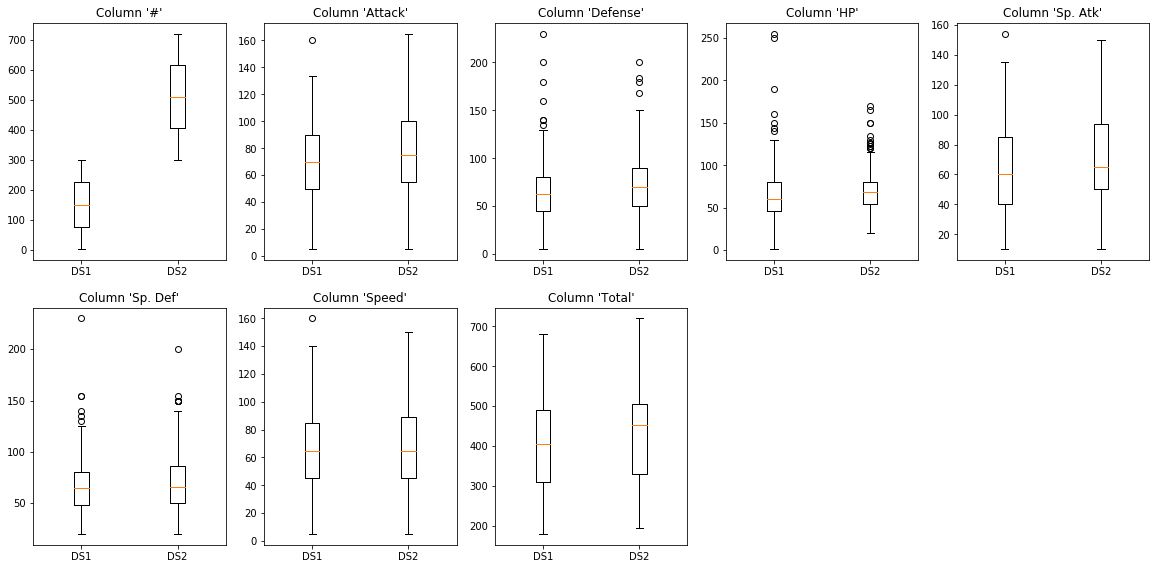

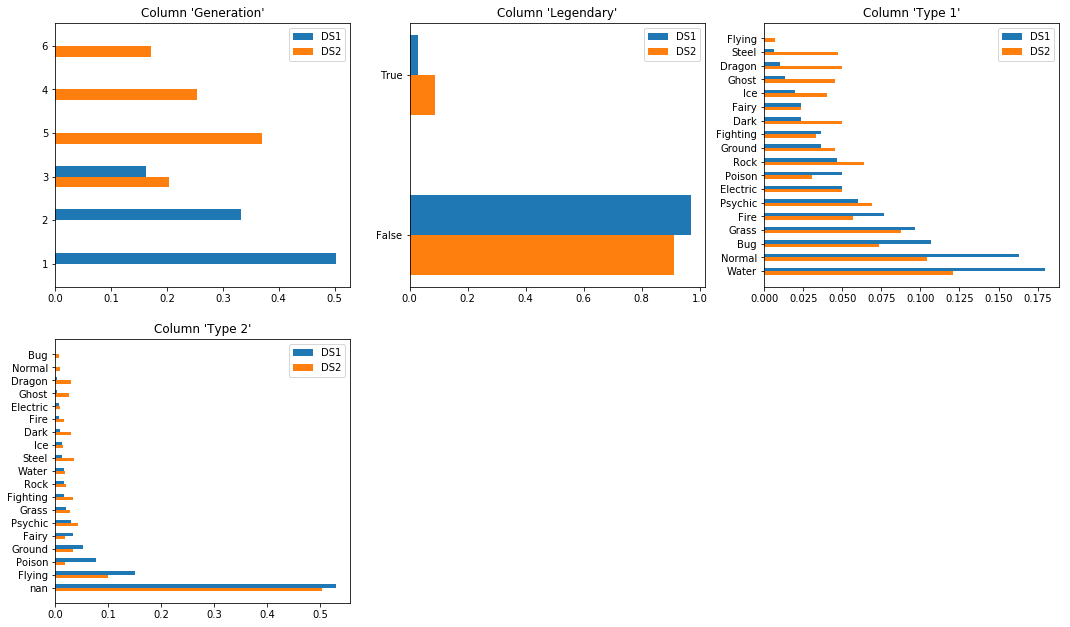

In [7]:
detector.evaluate()